In [25]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [91]:
m = -3
b = 7

x = np.arange(20)
noise = 5 * np.random.randn(len(x))
yNoise = m * x + b + noise
yActual = m * x + b

In [92]:
# Least-squares linear regression
def f(x, m_, b_): 
    return m_*x + b_
def obj(x, y, m_, b_): 
    return np.sum((y - f(x, m_, b_))**2)

res = minimize(lambda coeffs: obj(x, yNoise, *coeffs), x0=np.zeros(2))
res.x

array([-2.881627  ,  5.97659712])

In [99]:
# L-infinity norm linear regression
def obj2(x, y, m_, b_):
    return np.max((y - f(x, m_, b_))**2)

res2 = minimize(lambda coeffs: obj2(x, yNoise, *coeffs), x0=np.zeros(2))
res2.x

array([-2.15588819, -2.41696563])

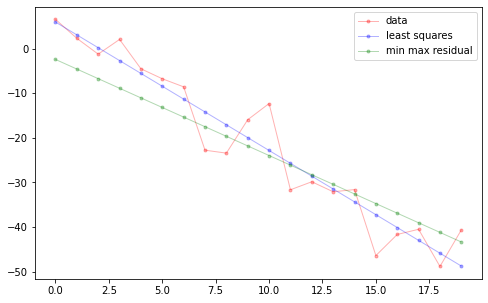

In [100]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.3, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='b', linewidth=1, alpha=0.3, label='least squares')
ax.plot(x, res2.x[0]*x + res2.x[1], '.-', color='g', linewidth=1, alpha=0.3, label='min max residual')
# ax.plot(X, yActual, '.-', color='g', linewidth=1, alpha=0.3, lable='true')
plt.legend()
plt.show()

In [101]:
# Second approach
# 1. Get a bunch of slopes around the same as the least-squares slope. 
# 2. For each slope, find the least-squares intercept.
# 3. Use the line to calculate the amounts of cut/fill.
# 4. Find the slope that results in the min(max(amount)), where amount is the cut/fill length.

In [103]:
m = -3
b = 7

x = np.arange(20)
noise = 5 * np.random.randn(len(x))
yNoise = m * x + b + noise
yActual = m * x + b

In [104]:
# Least-squares linear regression
def f(x, m_, b_): 
    return m_*x + b_
def obj(x, y, m_, b_): 
    return np.sum((y - f(x, m_, b_))**2)

res = minimize(lambda coeffs: obj(x, yNoise, *coeffs), x0=np.zeros(2))
res.x

array([-3.09434955,  8.15788566])

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), yNoise)
lr.coef_, lr.intercept_

(array([-3.09434952]), 8.15788538200357)

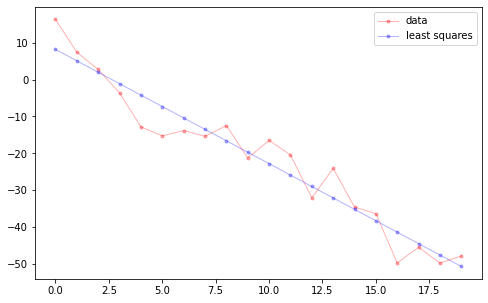

In [112]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.3, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='b', linewidth=1, alpha=0.3, label='least squares')
plt.legend()
plt.show()

In [123]:
# Find potential slopes
lstSqSlope = res.x[0]
slopeDelta = 2
numSlopes = 20
candidateSlopes = np.linspace(lstSqSlope - slopeDelta, lstSqSlope + slopeDelta, numSlopes)

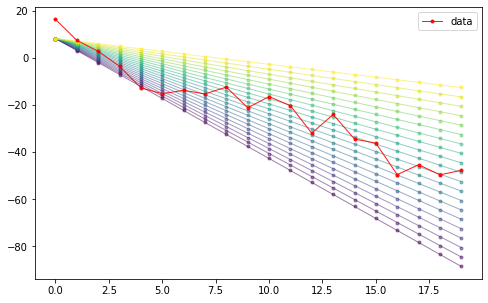

In [137]:
# Different slopes with fixed intercept.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, candidateSlopes[i]*x + res.x[1], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.9, label='data')
plt.legend()
plt.show()

In [139]:
candidateIntercepts = [np.mean(yNoise - m*x) for m in candidateSlopes]

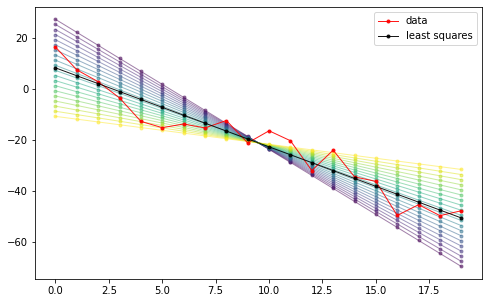

In [142]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, candidateSlopes[i]*x + candidateIntercepts[i], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.9, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='k', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

In [162]:
# Find the deltas.
lines = [(candidateSlopes[i],candidateIntercepts[i]) for i in range(len(candidateSlopes))]
deltas = []
for l in lines:
    deltas.append(np.abs(yNoise - (l[0] * x + l[1])))
deltas = np.asarray(deltas)
deltas.shape

(20, 20)

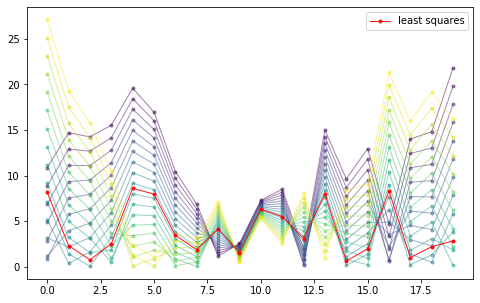

In [163]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, deltas[i], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, np.abs(yNoise - (res.x[0]*x + res.x[1])), '.-', color='r', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

In [166]:
max(deltas[0]), deltas[0]

(21.819840272918093,
 array([10.86149169, 14.68768655, 14.25041915, 15.5171944 , 19.59505233,
        16.95771614, 10.43480082,  6.8644038 ,  1.13065715,  2.55213521,
         7.29118753,  8.49259225,  1.91121692, 14.99217638,  9.62227509,
        12.95658625,  4.6916346 , 14.00374767, 14.80898597, 21.81984027]))

In [167]:
# Find min deltas.
best = 0
for i in range(len(deltas)):
    bestMax = max(deltas[best])
    bestCand = max(deltas[i])
    if bestCand < bestMax:
        best = i
best

10

In [171]:
max(deltas[best])

9.138508310226772

In [172]:
max(np.abs(yNoise - (res.x[0]*x + res.x[1])))

8.595052341322814

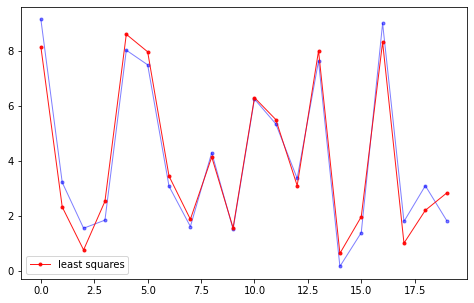

In [169]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
ax.plot(x, deltas[best], '.-', color='b', linewidth=1, alpha=0.5)
ax.plot(x, np.abs(yNoise - (res.x[0]*x + res.x[1])), '.-', color='r', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

In [173]:
# Second approach
# 1. Get a bunch of slopes around the same as the least-squares slope. 
# 2. For each slope, find the least-squares intercept.
# 3. Use the line to calculate the amounts of cut/fill.
# 4. Find the slope that results in the min(max(amount)), where amount is the cut/fill length.

In [175]:
m = -3
b = 7

x = np.arange(20)
noise = 20 * np.random.randn(len(x))
yNoise = m * x + b + noise
yActual = m * x + b

In [176]:
# Least-squares linear regression
def f(x, m_, b_): 
    return m_*x + b_
def obj(x, y, m_, b_): 
    return np.sum((y - f(x, m_, b_))**2)

res = minimize(lambda coeffs: obj(x, yNoise, *coeffs), x0=np.zeros(2))
res.x

array([-2.02426178, -0.22320112])

In [177]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), yNoise)
lr.coef_, lr.intercept_

(array([-2.02426165]), -0.2232028888442663)

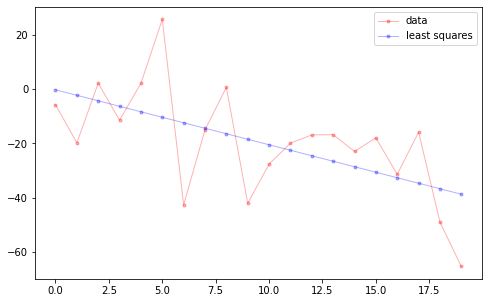

In [178]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.3, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='b', linewidth=1, alpha=0.3, label='least squares')
plt.legend()
plt.show()

In [179]:
# Find potential slopes
lstSqSlope = res.x[0]
slopeDelta = 2
numSlopes = 20
candidateSlopes = np.linspace(lstSqSlope - slopeDelta, lstSqSlope + slopeDelta, numSlopes)

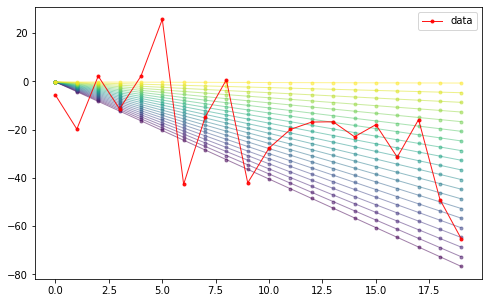

In [180]:
# Different slopes with fixed intercept.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, candidateSlopes[i]*x + res.x[1], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.9, label='data')
plt.legend()
plt.show()

In [181]:
candidateIntercepts = [np.mean(yNoise - m*x) for m in candidateSlopes]

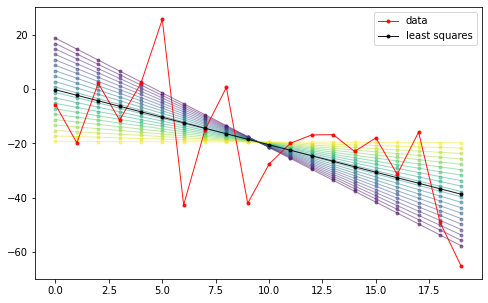

In [182]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, candidateSlopes[i]*x + candidateIntercepts[i], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.9, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='k', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

In [183]:
# Find the deltas.
lines = [(candidateSlopes[i],candidateIntercepts[i]) for i in range(len(candidateSlopes))]
deltas = []
for l in lines:
    deltas.append(np.abs(yNoise - (l[0] * x + l[1])))
deltas = np.asarray(deltas)
deltas.shape

(20, 20)

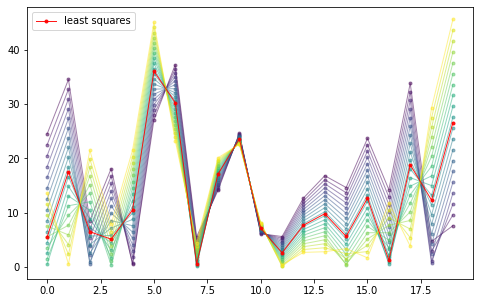

In [184]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
for i in range(len(candidateSlopes)):
    ax.plot(x, deltas[i], '.-', color=colors[i], linewidth=1, alpha=0.5)
ax.plot(x, np.abs(yNoise - (res.x[0]*x + res.x[1])), '.-', color='r', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

In [185]:
max(deltas[0]), deltas[0]

(37.254676414380356,
 array([24.47715589, 34.52640561,  8.5190903 , 18.11194507,  0.51550578,
        27.05837758, 37.25467641,  5.55337214, 14.08830646, 24.59248063,
         6.12803991,  5.59547484, 12.67590894, 16.79785232, 14.62438459,
        23.67177905, 14.22895607, 33.81988203,  4.71123873,  7.59348885]))

In [186]:
# Find min deltas.
best = 0
for i in range(len(deltas)):
    bestMax = max(deltas[best])
    bestCand = max(deltas[i])
    if bestCand < bestMax:
        best = i
best

6

In [187]:
max(deltas[best])

32.8336237828014

In [188]:
max(np.abs(yNoise - (res.x[0]*x + res.x[1])))

36.05837706871354

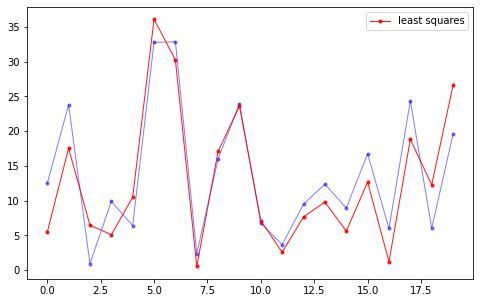

In [189]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
colors = plt.cm.viridis(np.linspace(0, 1, numSlopes))
ax.plot(x, deltas[best], '.-', color='b', linewidth=1, alpha=0.5)
ax.plot(x, np.abs(yNoise - (res.x[0]*x + res.x[1])), '.-', color='r', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()

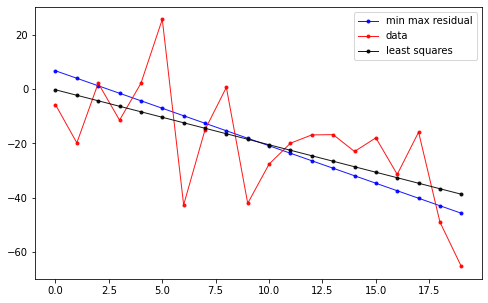

In [191]:
# Different slopes with solved intercepts.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, candidateSlopes[best]*x + candidateIntercepts[best], '.-', color='b', linewidth=1, alpha=0.9, label='min max residual')
ax.plot(x, yNoise, '.-', color='r', linewidth=1, alpha=0.9, label='data')
ax.plot(x, res.x[0]*x + res.x[1], '.-', color='k', linewidth=1, alpha=0.9, label='least squares')
plt.legend()
plt.show()